In [20]:
from Paths import Paths
from datasets.LupusDataset import LupusDataset, PerPatienceTargets
import numpy as np
from datasets.LupusFilter import TemporalSpanFilter
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [58]:
min_age_lower = 0.8  # 0.8, 1, 2]
min_age_upper = 0.8  # [0.8, 1, 2]
min_visits_neg = 1  # [1, 2, 3, 4, 5]
min_visits_pos = 1
strategy = PerPatienceTargets()

dataset = LupusDataset.no_test_dataset(Paths.lupus_path, strategy=strategy,
                                       visit_selector=TemporalSpanFilter(min_age_span_upper=min_age_upper,
                                                                         min_age_span_lower=min_age_lower,
                                                                         min_visits_neg=min_visits_neg,
                                                                         min_visits_pos=min_visits_pos))

In [59]:
def get_lengths(data):
    lengths = []
    for i in range(data.shape[1]):
        l = np.argmax(data[:, i])
        lengths.append(l)
    return lengths

In [60]:
neg = dataset.split_train["neg"].mask.squeeze()
length_neg = get_lengths(neg)
pos = dataset.split_train["late_pos"].mask.squeeze()
length_pos = get_lengths(pos)

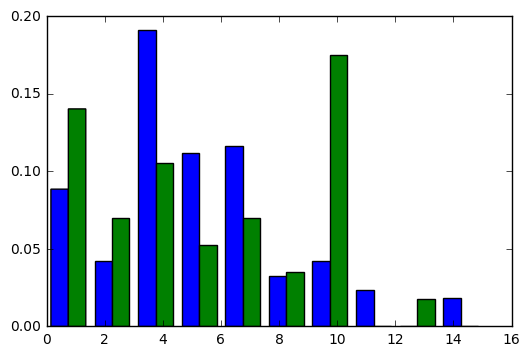

In [61]:
# the histogram of the data
n, bins, patches = plt.hist([np.array(length_neg), np.array(length_pos)], normed=1, label=['negatives', 'positives'])
plt.savefig('istogramma')
plt.show()

In [55]:
bins

array([  1. ,   2.4,   3.8,   5.2,   6.6,   8. ,   9.4,  10.8,  12.2,
        13.6,  15. ])